In [2]:
#imported packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

print("packages imported")

packages imported


# Problem Statement

Construct a linear regression model that predicts the duration of sleep given the time engaged in physical activity (in minutes), stress-level experienced (between 1-10), and self-reported quality of sleep (between 1-10) for 374 people.

# Variables and Parameters

| Symbol | Description | Type | Dimension | Units |
|---|---|---|---|---|
| $Y$ | duration of sleep | dependent variable | $T$ | hours |
| $B_0$ | regression coefficient for sleep duration | parameter | $T$ | hours |
| $X_1$ | time engaged in physical activity during the day | independent variable | $T$ | minutes |
| $B_1$ | regression coefficient for physical activity | parameter | $T$ | minutes |
| $X_2$ | self-reported stress level experienced (scale of 1 - 10) | independent variable | 1 | unitless |
| $B_2$ | regression coefficient for stress level | parameter | 1 | unitless |
| $X_3$ | self-reported quality of sleep (scale of 1 - 10) | independent variable | 1 | unitless |
| $B_3$ | regression coefficient for quality of sleep | parameter | 1 | unitless |
| $\epsilon$ | residual error | parameter | $T$ | hours |

# Assumptions and Constraints

- The subjective formulation of a score from 1 to 10 for stress and sleep quality is uniform across all participants.
- Participants do not lie about the times or scores.
- Assume that the data comes from 374 people of working age with no sleep-related diseases.
- Participants in the data reflect an average sample from the general population this model will be applied to.
- No other variables affect sleep duration.
- Assume sleep data follows a linear pattern and the variables are linearly independent of each other.
- The average value of the errors is 0.
- The variance of the errors is constant.
- Error is a random sample from normal distribution of zero mean and variance $\sigma^2$.
- Errors from each observation are independent of one another.

# Building the Solution

The linear regression model is defined as $$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \epsilon$$

In [3]:
sleep_data = pd.read_csv('Sleep.csv')
sleep = pd.DataFrame(sleep_data)
sleep.head()

,Duration,Quality,Physical_Activity,Stress
0,6.1,6,42,6
1,6.2,6,60,8
2,6.2,6,60,8
3,5.9,4,30,8
4,5.9,4,30,8


## Untransformed Model

X = sleep[['Physical_Activity','Quality','Stress']]
Y = sleep['Duration']
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
print(reg.summary())

In [5]:
print(reg.params)

const                3.673707
Physical_Activity    0.002414
Quality              0.498098
Stress              -0.060716
dtype: float64


### Assumption: Average value of the errors is zero.

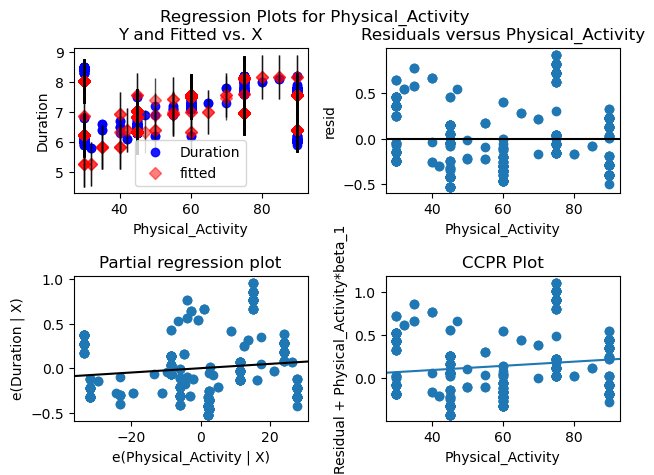

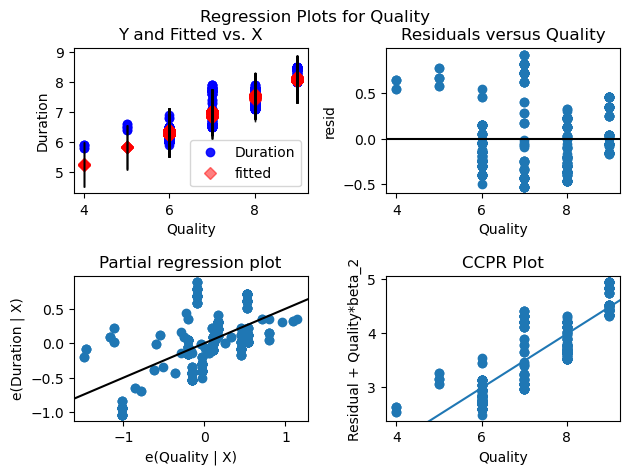

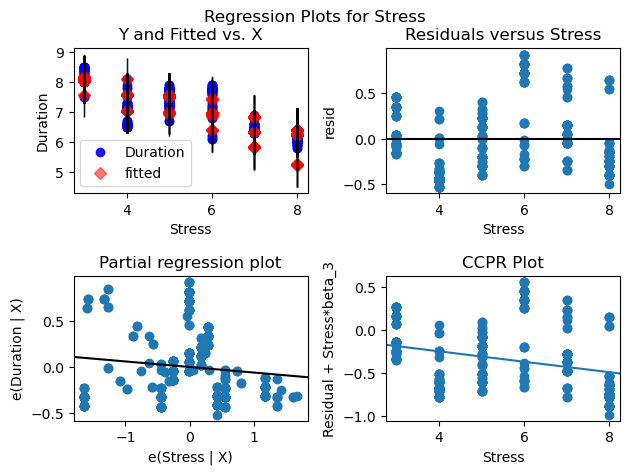

In [6]:
sm.graphics.plot_regress_exog(reg,'Physical_Activity')
plt.show()

sm.graphics.plot_regress_exog(reg,'Quality')
plt.show()

sm.graphics.plot_regress_exog(reg,'Stress')
plt.show()

### Assumption: Variance of errors is constant.

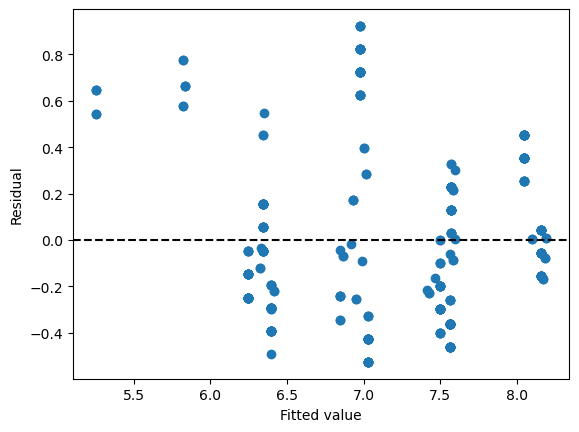

In [7]:
fitted_y = reg.fittedvalues

residuals = reg.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y=0,color='k',linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

### Assumption: Errors are normally distributed.

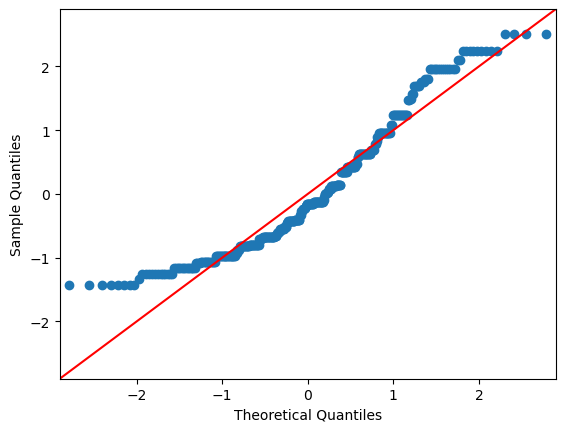

In [8]:
sm.qqplot(residuals, fit=True, line="45")
plt.show()

## Transformations

In [9]:
sleepTransformed = sleep.copy()
X = sleepTransformed[['Physical_Activity','Quality','Stress']]
Y = sleepTransformed['Duration']
X = sm.add_constant(X)
original_reg = sm.OLS(Y, X).fit()
# print(reg.summary())
print(original_reg.rsquared_adj)

0.7833097936534077


### Taking the square root of the Stress values

In [10]:
sleepTransformed = sleep.copy()
sleepTransformed['Stress'] = sleepTransformed['Stress']**(1/2)
X = sleepTransformed[['Physical_Activity','Quality','Stress']]
Y = sleepTransformed['Duration']
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     448.0
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          9.10e-123
Time:                        03:16:23   Log-Likelihood:                -158.00
No. Observations:                 374   AIC:                             324.0
Df Residuals:                     370   BIC:                             339.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.8113      0.54

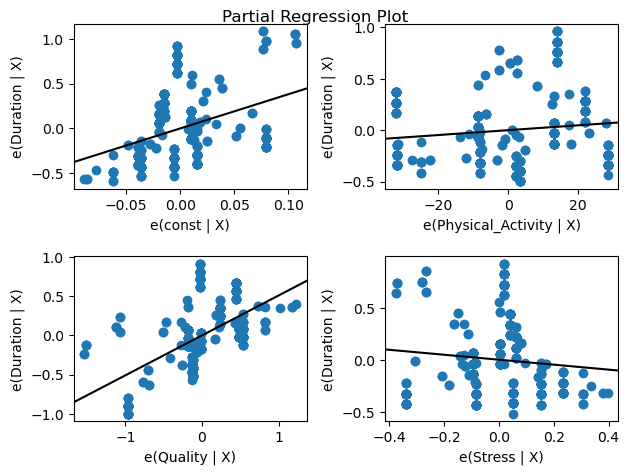

In [11]:
sm.graphics.plot_partregress_grid(reg)
plt.show()

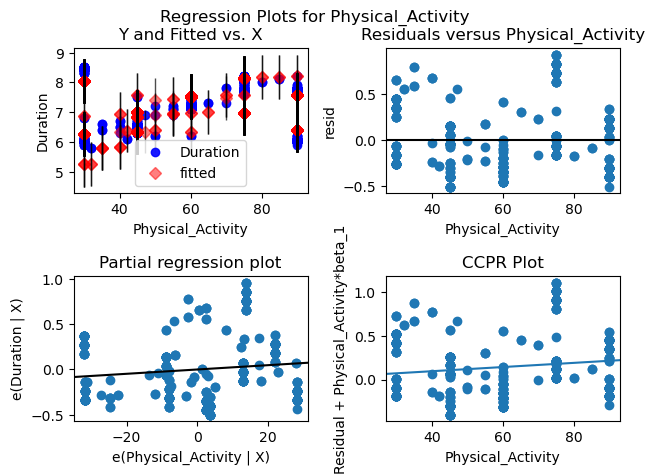

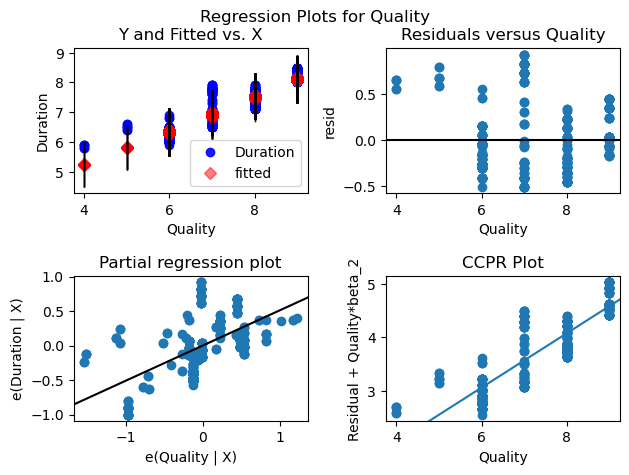

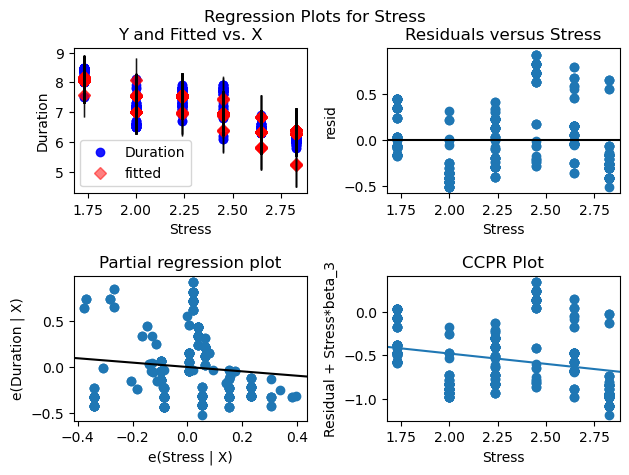

In [12]:
sm.graphics.plot_regress_exog(reg,'Physical_Activity')
plt.show()

sm.graphics.plot_regress_exog(reg,'Quality')
plt.show()

sm.graphics.plot_regress_exog(reg,'Stress')
plt.show()

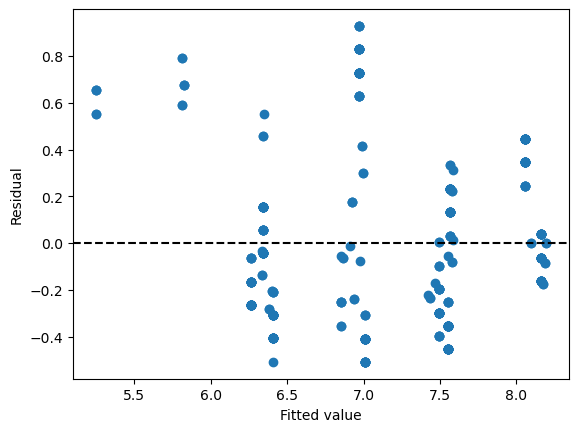

In [13]:
fitted_y = reg.fittedvalues

residuals = reg.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y=0,color='k',linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

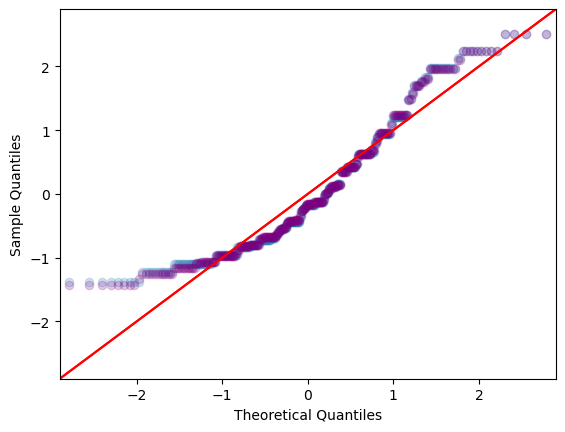

In [14]:
original_residuals = original_reg.resid

fig, ax = plt.subplots()

sm.qqplot(residuals, fit = True, line='45', alpha = 0.2, ax=ax)
sm.qqplot(original_residuals, fit = True, line='45', markerfacecolor='purple', markeredgecolor='purple', alpha = 0.2, ax=ax)

plt.show()

### Taking the square of the Stress values

In [15]:
sleepTransformed = sleep.copy()
sleepTransformed['Stress'] = sleepTransformed['Stress']**2
X = sleepTransformed[['Physical_Activity','Quality','Stress']]
Y = sleepTransformed['Duration']
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     458.3
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          3.36e-124
Time:                        03:19:04   Log-Likelihood:                -154.67
No. Observations:                 374   AIC:                             317.3
Df Residuals:                     370   BIC:                             333.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.7246      0.31

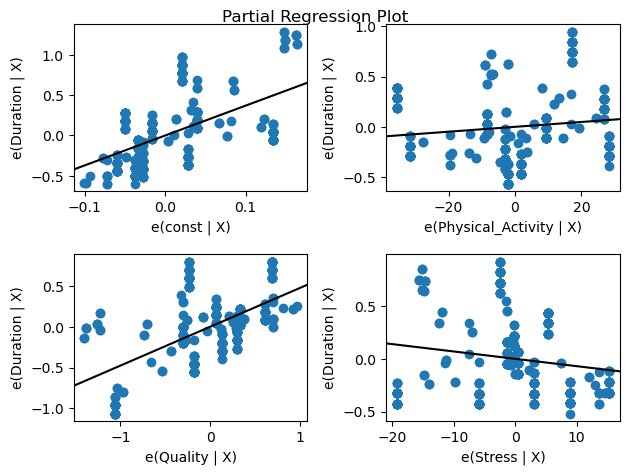

In [16]:
sm.graphics.plot_partregress_grid(reg)
plt.show()

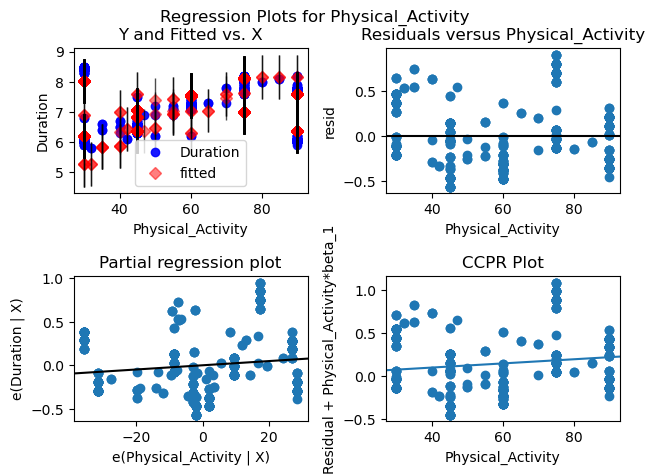

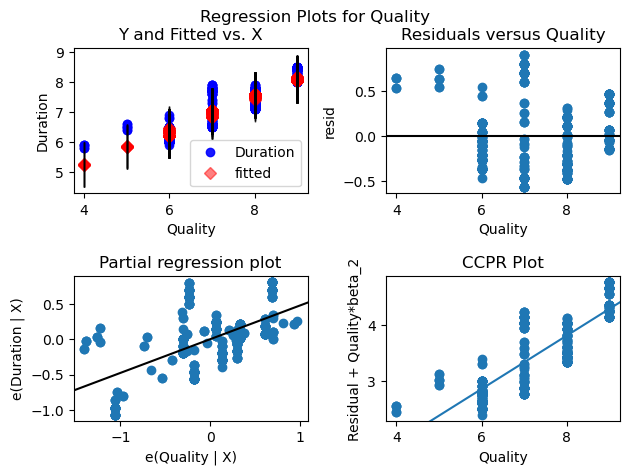

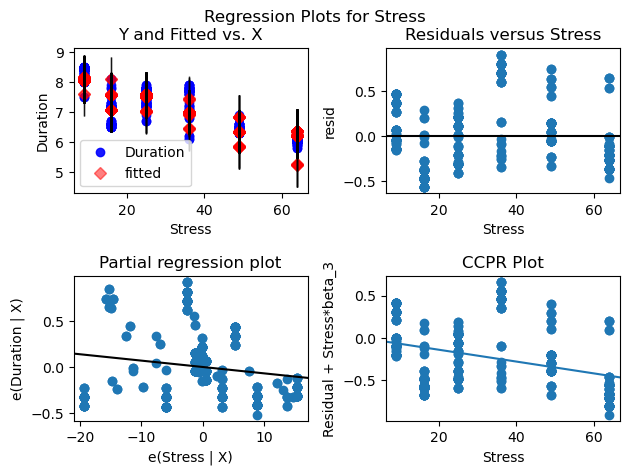

In [17]:
sm.graphics.plot_regress_exog(reg,'Physical_Activity')
plt.show()

sm.graphics.plot_regress_exog(reg,'Quality')
plt.show()

sm.graphics.plot_regress_exog(reg,'Stress')
plt.show()